# analyser les durées d'appel

Les 10 meilleurs jours et heures pour avoir un long appel :
     weekday_a1 hour_a1  total_duration
26  2Wednesday     h19       13.210446
3      0Monday     h14       12.389860
0      0Monday     h10       12.066201
15    1Tuesday     h17       11.964184
39     4Friday     h14       11.943347
1      0Monday     h11       11.846796
41     4Friday     h16       11.830472
24  2Wednesday     h17       11.817615
38     4Friday     h12       11.740632
2      0Monday     h12       11.496220


<Figure size 1200x800 with 0 Axes>

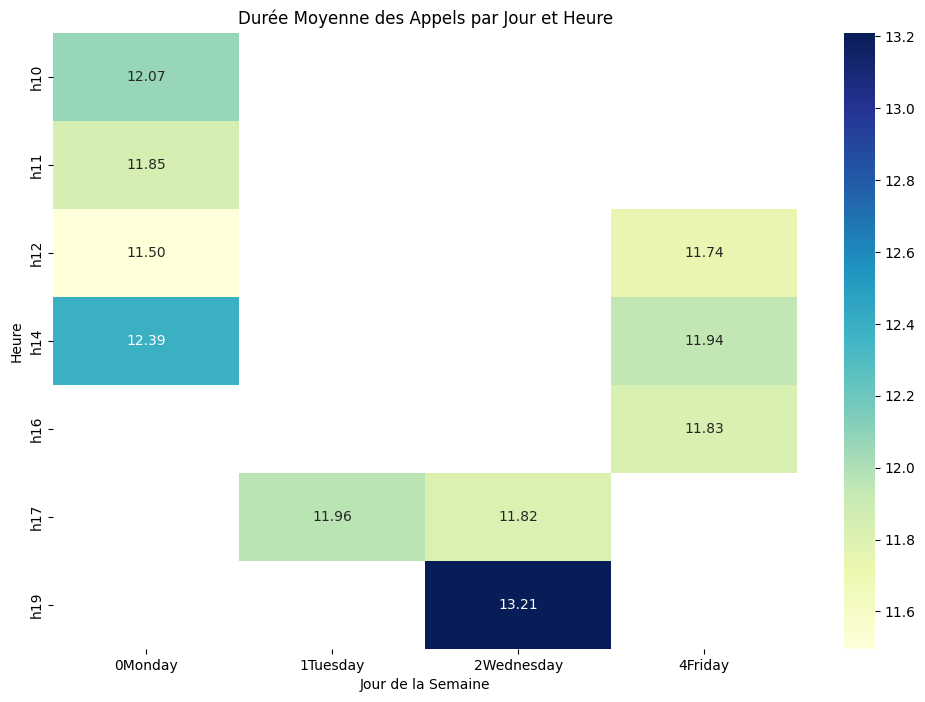

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
calls_a1 = pd.read_csv("calls_a1.csv/calls_a1.csv")
calls_a2 = pd.read_csv("calls_a2.csv/calls_a2.csv")
calls_a3 = pd.read_csv("calls_a3.csv/calls_a3.csv")
calls_a4 = pd.read_csv("calls_a4.csv/calls_a4.csv")

# Concaténation des dataframes
calls = pd.concat([calls_a1, calls_a2, calls_a3, calls_a4])

# Conversion des colonnes date_a1, date_a2, date_a3, date_a4 en type datetime
for col in ['date_a1', 'date_a2', 'date_a3', 'date_a4']:
    calls[col] = pd.to_datetime(calls[col])

# Calcul de la durée totale de chaque appel
calls['total_duration'] = calls['duration_a1'] + calls['duration_a2'] + calls['duration_a3'] + calls['duration_a4']

# Sélection des colonnes pour l'analyse
selected_cols = ['weekday_a1', 'hour_a1', 'total_duration']

# Groupement par jour et heure avec la durée moyenne de l'appel
grouped_data = calls[selected_cols].groupby(['weekday_a1', 'hour_a1']).mean().reset_index()

# Sélection des 10 meilleurs jours et heures pour avoir un long appel
top_10_long_calls = grouped_data.sort_values(by='total_duration', ascending=False).head(10)

# Affichage des résultats
print("Les 10 meilleurs jours et heures pour avoir un long appel :\n", top_10_long_calls)

# Visualisation des résultats
plt.figure(figsize=(12, 8))
# Création du tableau croisé dynamique pour le heatmap
heatmap_data = top_10_long_calls.pivot(index='hour_a1', columns='weekday_a1', values='total_duration')

# Visualisation des résultats avec seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Durée Moyenne des Appels par Jour et Heure")
plt.xlabel("Jour de la Semaine")
plt.ylabel("Heure")
plt.show()